In [1]:
from glob import glob 
from os import listdir
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from skimage.io import imread
import seaborn as sns
from matplotlib import style 
style.use('dark_background')

ModuleNotFoundError: No module named 'skimage'

Our dataset is from kaggle where it was reposted from a couple of different deep learning studies. 

# Exploratory Data Analysis 

In [2]:
#folders = listdir('data/breast-histopathology-images/')

In [3]:
images = glob('data\sorted\**\*.png')

In [4]:
#len(folders)

In [5]:
#folders[:5]

There are 279 folders which each represent a different patient. 

In [6]:
len(images)

277524

In [7]:
images[:5]

['data\\sorted\\0\\10253_idx5_x1001_y1001_class0.png',
 'data\\sorted\\0\\10253_idx5_x1001_y1051_class0.png',
 'data\\sorted\\0\\10253_idx5_x1001_y1101_class0.png',
 'data\\sorted\\0\\10253_idx5_x1001_y1151_class0.png',
 'data\\sorted\\0\\10253_idx5_x1001_y1201_class0.png']

277,524 separate 50x50 images in our list. 

We're going to create a dataframe of our images to do some exploratory data analysis. First, we create a function in order to gather each image's patient id, x and y coordinates, and whether the image contains cancer in it or not. 

In [8]:
def get_image_info(filepath):
    #store the filepath so we can access the image later
    path = filepath
    #split the filepath by double backslashes
    firstsplit = filepath.split('\\')
    #next split is just the filename and it's done by underscore
    secondsplit = firstsplit[3].split('_')
    #first part of the filename is the patient id number
    patient_id = secondsplit[0]
    #2nd part of the filename is the x coordinate
    xcoord = secondsplit[2][1:]
    #3rd part of the filename is the ycoordinate
    ycoord = secondsplit[3][1:]
    #each folder that the image in has the target label on it.
    target = firstsplit[2]
    #append each of these splits to different lists to combine into a dataframe
    patients.append(patient_id)
    xs.append(xcoord)
    ys.append(ycoord)
    targets.append(target)
    paths.append(path)
    

In [9]:
#start 4 empty lists to store our values from our function 
patients = []
xs = []
ys = []
targets = []
paths = []

#loop through each image
for i in images:
    get_image_info(i)

#creates the dataframe    
df = pd.DataFrame(patients)
#adds each of our other columns to the df
df['x'] = xs
df['y'] = ys
df['target'] = targets
#change all columns to integers before we add the filepaths
df = df.apply(pd.to_numeric)
df['image'] = paths
#renamed our first column
df.rename(columns={0:'patient_id'}, inplace=True)
print(df['patient_id'].nunique())
print(df.shape)
df.head()

279
(277524, 5)


,patient_id,x,y,target,image
0,10253,1001,1001,0,data\sorted\0\10253_idx5_x1001_y1001_class0.png
1,10253,1001,1051,0,data\sorted\0\10253_idx5_x1001_y1051_class0.png
2,10253,1001,1101,0,data\sorted\0\10253_idx5_x1001_y1101_class0.png
3,10253,1001,1151,0,data\sorted\0\10253_idx5_x1001_y1151_class0.png
4,10253,1001,1201,0,data\sorted\0\10253_idx5_x1001_y1201_class0.png


The description of the dataset indicated that the data contained 277,524 images from 279 different patients.

Each row is an image and we have 279 unique patient_ids so our function performed perfectly. 

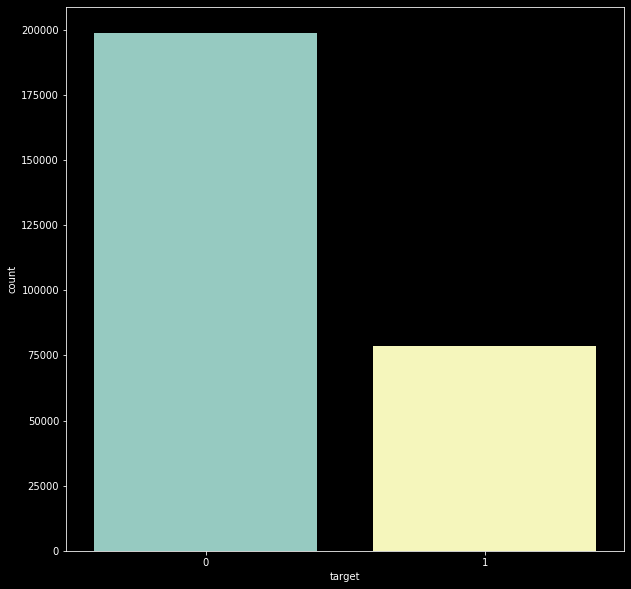

In [10]:
plt.rcParams["figure.figsize"] = (10,10)
sns.countplot(x='target', data=df)
plt.show()

In [11]:
df['target'].value_counts(normalize=True)

0    0.716111
1    0.283889
Name: target, dtype: float64

Our dataset is 71% negative for cancer and 28% positive. This is highly imbalanced and should be considered when we begin on our model.


Let's see what the images actually look like. 

In [12]:
#images that are negative for cancer
neg_images = np.random.choice(df[df.target==0].index.values, size=30, replace=False)
#images that are postive for cancer
pos_images = np.random.choice(df[df.target==1].index.values, size=30, replace=False)

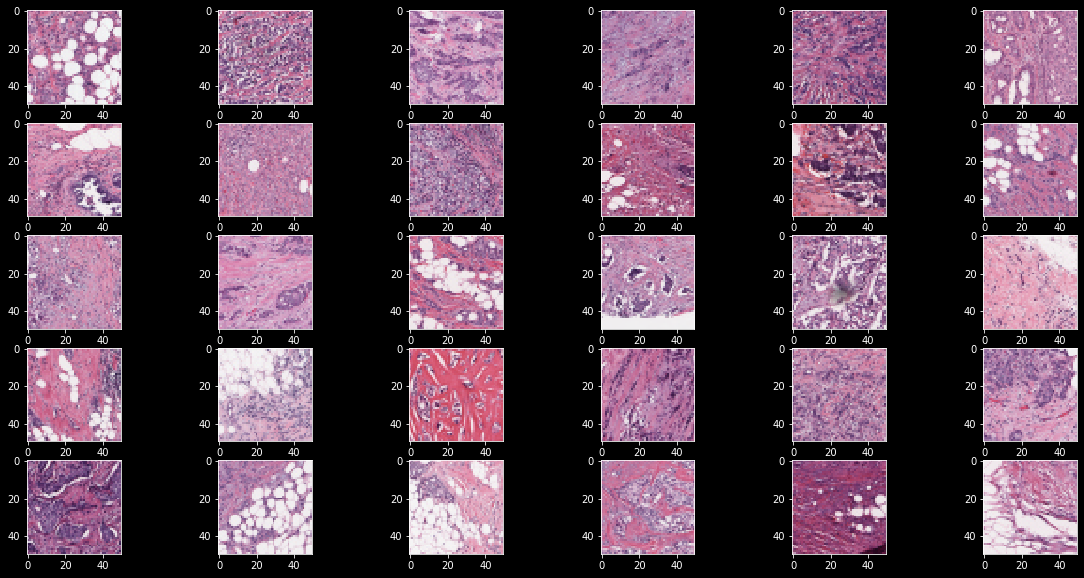

In [13]:
#Cancerous Images
fig, ax = plt.subplots(5,6,figsize=(20,10))

for n in range(5):
    for m in range(6):
        idx = pos_images[m + 6*n]
        image = imread(df.loc[idx, "image"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

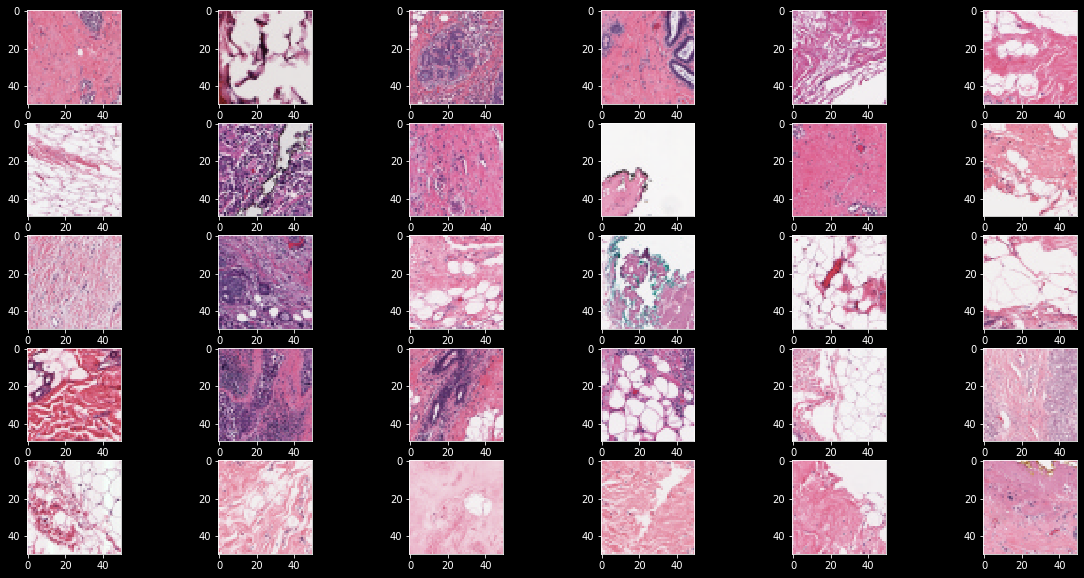

In [14]:
#Non-cancerous images
fig, ax = plt.subplots(5,6,figsize=(20,10))

for n in range(5):
    for m in range(6):
        idx = neg_images[m + 6*n]
        image = imread(df.loc[idx, "image"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

From comparing the two sets of images, it appears that the cancerous ones are a lot more purple.

In [15]:
df.head()

,patient_id,x,y,target,image
0,10253,1001,1001,0,data\sorted\0\10253_idx5_x1001_y1001_class0.png
1,10253,1001,1051,0,data\sorted\0\10253_idx5_x1001_y1051_class0.png
2,10253,1001,1101,0,data\sorted\0\10253_idx5_x1001_y1101_class0.png
3,10253,1001,1151,0,data\sorted\0\10253_idx5_x1001_y1151_class0.png
4,10253,1001,1201,0,data\sorted\0\10253_idx5_x1001_y1201_class0.png


Let's see what the breakdown of cancer is for each patient.

In [16]:
#dropping the image column since we don't need it for our groupbys
targetdf = df.drop(columns='image')
#create a counter so we can get an idea of how many images each patient has.
targetdf['count'] = 1
#grouping by patient id and adding
targetdf = targetdf.groupby('patient_id').agg('sum')
#dropping the coordinates because adding all of our xs and ys together is meaningless
targetdf.drop(columns=['x','y'], inplace=True)
#create a new column that gives us a proportion of cancer in each patient's imagesets
targetdf['%_cancerous'] = (targetdf['target']/targetdf['count']*100).round(2)
targetdf.head()

,target,count,%_cancerous
patient_id,,,
8863,207,979,21.14
8864,328,1133,28.95
8865,55,712,7.72
8867,162,1642,9.87
8913,82,955,8.59


In [17]:
targetdf['%_cancerous'].nlargest(10)

patient_id
14209    90.35
9262     85.11
12873    82.56
9077     77.82
12241    75.66
8957     74.77
15633    74.72
10275    71.90
13694    70.73
15514    69.12
Name: %_cancerous, dtype: float64

In [18]:
len(targetdf[targetdf['%_cancerous'] > 50])

61

61 of our 279 patients have imagesets in which a majority of the images have cancer contained in them. 

In [19]:
targetdf['%_cancerous'].nsmallest(10)

patient_id
10305    1.04
10268    1.09
10272    1.15
16085    1.24
12750    1.46
12905    1.73
10300    1.94
10288    2.06
10259    2.12
12869    2.26
Name: %_cancerous, dtype: float64

In [20]:
len(targetdf[targetdf['%_cancerous'] < 10])

43

On the other hand, 43 of our patients have less than 10% of their images containing cancer within them. This dataset varies widely which is a good thing. This makes our model more robust should we use it in the future on new data. 

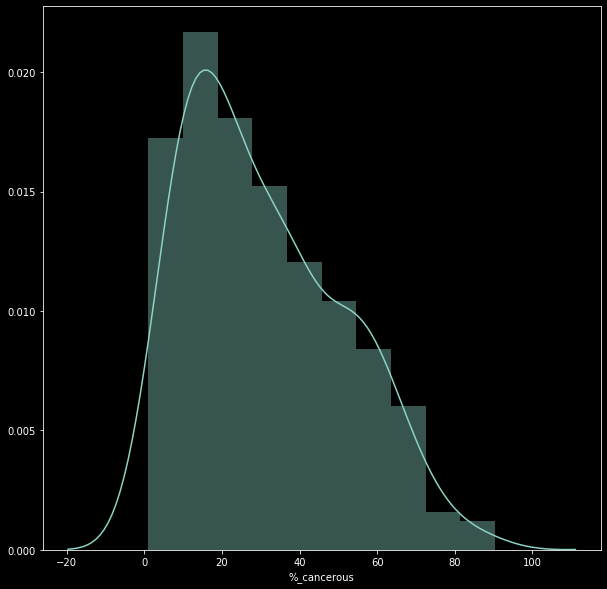

In [21]:
sns.distplot(targetdf['%_cancerous'])
plt.show()

In [22]:
targetdf['count'].nlargest(10)

patient_id
13693    2395
16550    2302
10288    2278
10308    2278
9323     2216
8975     2212
16551    2183
10272    2175
16165    2111
10268    2109
Name: count, dtype: int64

In [23]:
targetdf['count'].nsmallest(10)

patient_id
16534     63
9262      94
8957     111
9175     118
16895    151
12241    152
12876    155
12933    155
9044     158
12929    160
Name: count, dtype: int64

The range of representation between each patient is incredibly wide. Some patients have as many as 2000+ images while others contain less than 100. 



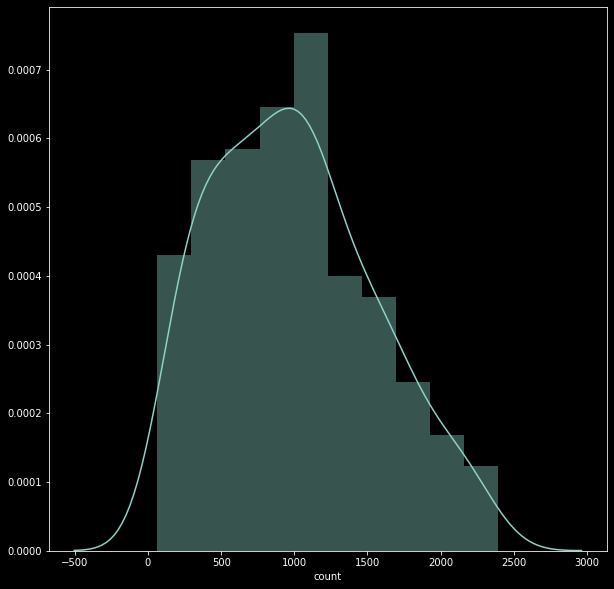

In [24]:
sns.distplot(targetdf['count'])
plt.show()

In [25]:
len(targetdf)

279

Here's  a subset of the top 30 patients by patient id. There doesn't seem to be any correlation between number of images and cancerous images as a percent of the total. 

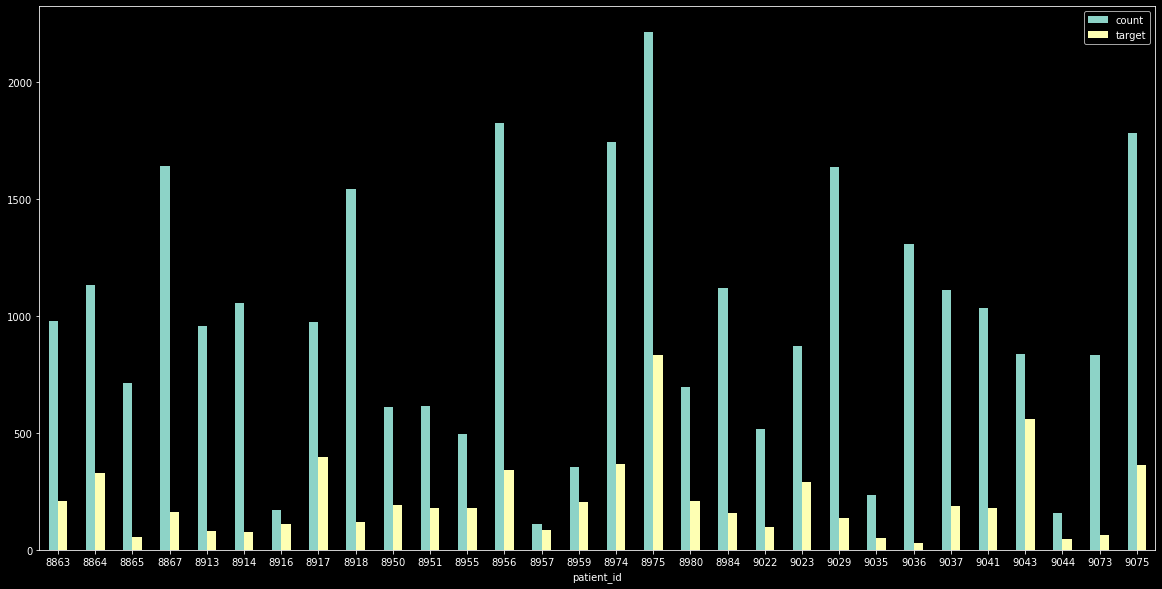

In [26]:
plt.rcParams["figure.figsize"] = (20,10)
targetdf[['count', 'target']].head(30).plot(kind='bar', rot=0)
plt.show()

Is there a relationship between coordinates and cancer?

In [27]:
#total number of each x in our dataset
total_xs = df.x.value_counts()
#total number of each y in our dataset 
total_ys = df.y.value_counts()
#creating a dataframe of only cancerous rows
cancerdf = df[df.target==1]
#total number of xs that are cancerous
total_cancer_xs = cancerdf.x.value_counts()
#total number of ys that are cancerous 
total_cancer_ys = cancerdf.y.value_counts()

In [28]:
#Creating our dataframe to compare the xs between cancerous and noncancerous
xdf = pd.DataFrame(total_xs)
xdf['cancerous_x'] = total_cancer_xs
xdf['%_cancerous'] = (xdf['cancerous_x']/xdf['x'])*100
xdf.rename(columns={'x':'total_x'}, inplace=True)
print(xdf.shape)
xdf.head(10)


(81, 3)


,total_x,cancerous_x,%_cancerous
1501,5944,2348.0,39.502019
1551,5942,2297.0,38.657018
1451,5938,2331.0,39.255642
1651,5904,2291.0,38.804201
1601,5880,2304.0,39.183673
1701,5864,2262.0,38.574352
1751,5828,2193.0,37.628689
1401,5818,2254.0,38.741836
1801,5759,2120.0,36.811947
1351,5751,2146.0,37.315250


Only 81 unique x coordinates across 277524 images. 

Seems there definitely could be a connection between x coordinates and the likelihood of cancer presence. The total number of specific x coordinates exceeds even the highest patient image totals so we know these cancerous images are across multiple patients and not just the result of one patient's histopathology. 

In [29]:
xdf['%_cancerous'].nsmallest(10)

51      2.034884
101     2.800295
3901    3.278689
151     4.935502
201     7.606762
251     8.590139
3501    9.309791
3551    9.333333
3751    9.392265
3851    9.411765
Name: %_cancerous, dtype: float64

In [30]:
xdf['%_cancerous'].nlargest(10)

1501    39.502019
1451    39.255642
1601    39.183673
1651    38.804201
1401    38.741836
1551    38.657018
1701    38.574352
1751    37.628689
1351    37.315250
1801    36.811947
Name: %_cancerous, dtype: float64

Coordinates range from 2% - 39.5% of images being cancerous. Let's look at a random sample of 30. 

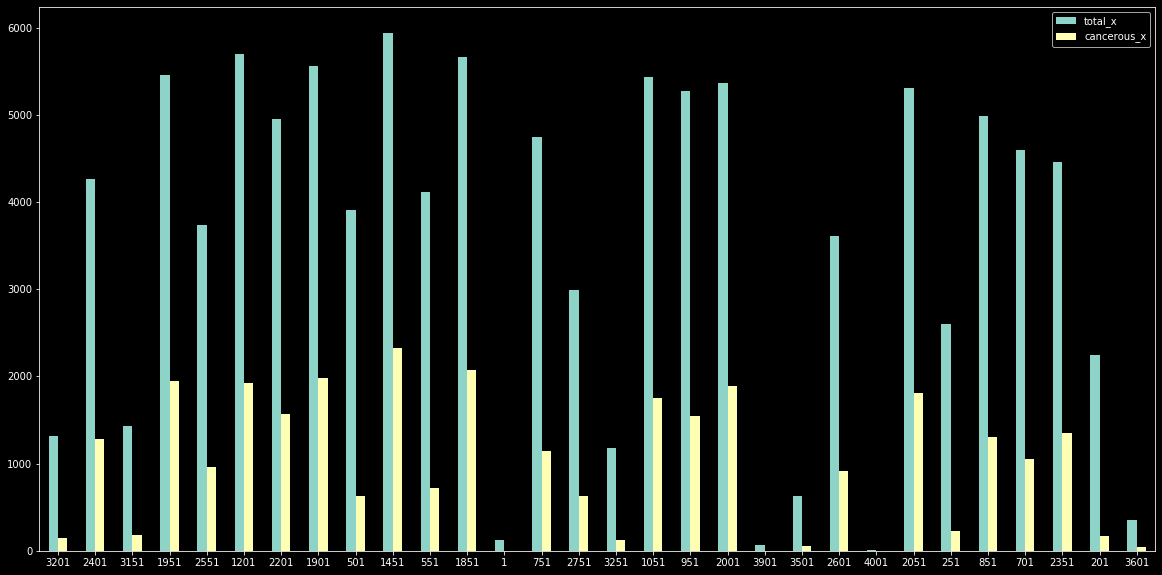

In [31]:
xdf[['total_x', 'cancerous_x']].sample(30, random_state=7).plot(kind='bar', rot=0)
plt.show()

A wide range of total and cancerous xs. Let's take a look at ys. 

In [32]:
ydf = pd.DataFrame(total_ys)
ydf['cancerous_y'] = total_cancer_ys
ydf['%_cancerous'] = (ydf['cancerous_y']/ydf['y'])*100
ydf.rename(columns={'y':'total_y'}, inplace=True)
print(ydf.shape)
ydf.head(10)

(60, 3)


,total_y,cancerous_y,%_cancerous
1001,8012,2626.0,32.775836
1051,7999,2667.0,33.341668
1151,7975,2696.0,33.805643
951,7966,2592.0,32.538288
1101,7917,2683.0,33.889099
1201,7906,2633.0,33.303820
901,7884,2464.0,31.253171
1251,7866,2622.0,33.333333
1301,7789,2560.0,32.866864
851,7763,2337.0,30.104341


About 25% less y coordinates than xs. I would expect this to lead to a higher % of cancerous or perhaps less of a spread. 

In [33]:
ydf['%_cancerous'].nsmallest(10)

2901     0.947867
2851     3.001876
1        4.903846
51       9.679408
101     10.492228
2801    11.206897
151     12.369792
2651    13.620885
2701    14.842579
2601    15.488565
Name: %_cancerous, dtype: float64

In [34]:
ydf['%_cancerous'].nlargest(10)

1101    33.889099
1151    33.805643
1551    33.644574
1601    33.434602
1051    33.341668
1251    33.333333
1201    33.303820
1451    33.041983
1301    32.866864
1001    32.775836
Name: %_cancerous, dtype: float64

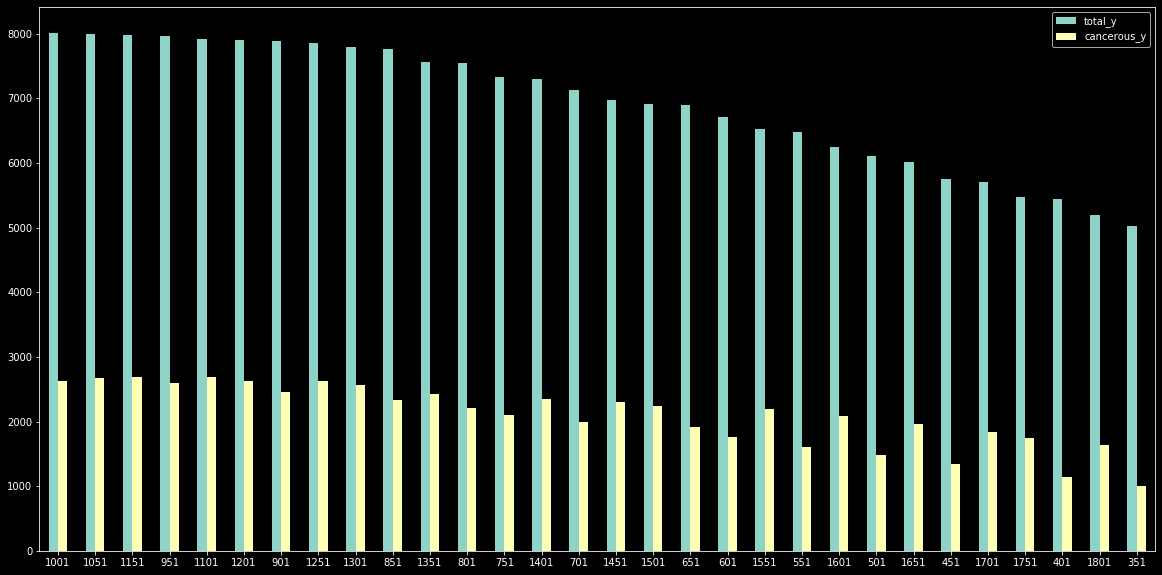

In [35]:
ydf[['total_y', 'cancerous_y']].head(30).plot(kind='bar', rot=0)
plt.show()

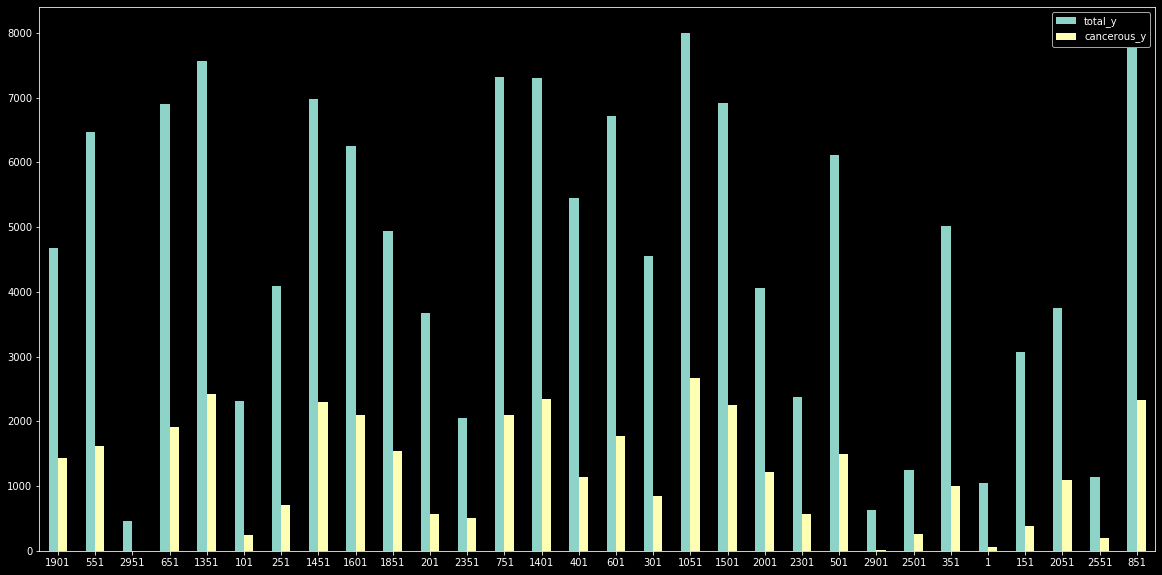

In [36]:
ydf[['total_y', 'cancerous_y']].sample(30, random_state=7).plot(kind='bar', rot=0)
plt.show()

Overall, the ys seem pretty similar to the xs in terms of the distribution of cancerous to non-cancerous images.

Onto preprocessing and building our model. 

